In [1]:
import pandas as pd

# Define file paths
input_file = "main.csv"
output_file = "main2.csv"

# Define chunk size
chunksize = 100000  # Adjust as per system capacity

# Columns to remove
columns_to_remove = ["User", "Card", "Year"]

# Process CSV in chunks
with pd.read_csv(input_file, chunksize=chunksize) as reader:
    for i, chunk in enumerate(reader):
        chunk.drop(columns=columns_to_remove, inplace=True)
        
        # Write to CSV (append after first write)
        if i == 0:
            chunk.to_csv(output_file, index=False, mode='w')
        else:
            chunk.to_csv(output_file, index=False, mode='a', header=False)
        
        print(f"Processed chunk {i+1}")

print("Columns removed and saved to main2.csv successfully!")


Processed chunk 1
Processed chunk 2
Processed chunk 3
Processed chunk 4
Processed chunk 5
Processed chunk 6
Processed chunk 7
Processed chunk 8
Processed chunk 9
Processed chunk 10
Processed chunk 11
Processed chunk 12
Processed chunk 13
Processed chunk 14
Processed chunk 15
Processed chunk 16
Processed chunk 17
Processed chunk 18
Processed chunk 19
Processed chunk 20
Processed chunk 21
Processed chunk 22
Processed chunk 23
Processed chunk 24
Processed chunk 25
Processed chunk 26
Processed chunk 27
Processed chunk 28
Processed chunk 29
Processed chunk 30
Processed chunk 31
Processed chunk 32
Processed chunk 33
Processed chunk 34
Processed chunk 35
Processed chunk 36
Processed chunk 37
Processed chunk 38
Processed chunk 39
Processed chunk 40
Processed chunk 41
Processed chunk 42
Processed chunk 43
Processed chunk 44
Processed chunk 45
Processed chunk 46
Processed chunk 47
Processed chunk 48
Processed chunk 49
Processed chunk 50
Processed chunk 51
Processed chunk 52
Processed chunk 53
Pr

In [3]:
import pandas as pd

# Define file paths
input_file = 'main2.csv'
output_file = 'main3.csv'  # You can rename this file as needed

# Define chunk size (adjust based on your system's capacity)
chunksize = 250000

# Function to fix negative values in "Merchant Name"
def fix_merchant_name(name):
    if isinstance(name, str) and name.startswith('-'):
        # Remove the leading '-' and any extra whitespace
        return name.lstrip('-').strip()
    return name

# Process CSV in chunks
with pd.read_csv(input_file, chunksize=chunksize) as reader:
    for i, chunk in enumerate(reader):
        # 1. Remove "$" sign from the "Amount" column and convert to numeric
        chunk['Amount'] = chunk['Amount'].replace({'\$': ''}, regex=True)
        chunk['Amount'] = pd.to_numeric(chunk['Amount'], errors='coerce')
        
        # 2. Fix negative values in "Merchant Name"
        chunk['Merchant Name'] = chunk['Merchant Name'].apply(fix_merchant_name)
        
        # Write to CSV (write header for the first chunk, then append without header)
        if i == 0:
            chunk.to_csv(output_file, index=False, mode='w')
        else:
            chunk.to_csv(output_file, index=False, mode='a', header=False)
        
        print(f"Processed chunk {i+1}")

print("Data processed and saved to", output_file, "successfully!")


Processed chunk 1
Processed chunk 2
Processed chunk 3
Processed chunk 4
Processed chunk 5
Processed chunk 6
Processed chunk 7
Processed chunk 8
Processed chunk 9
Processed chunk 10
Processed chunk 11
Processed chunk 12
Processed chunk 13
Processed chunk 14
Processed chunk 15
Processed chunk 16
Processed chunk 17
Processed chunk 18
Processed chunk 19
Processed chunk 20
Processed chunk 21
Processed chunk 22
Processed chunk 23
Processed chunk 24
Processed chunk 25
Processed chunk 26
Processed chunk 27
Processed chunk 28
Processed chunk 29
Processed chunk 30
Processed chunk 31
Processed chunk 32
Processed chunk 33
Processed chunk 34
Processed chunk 35
Processed chunk 36
Processed chunk 37
Processed chunk 38
Processed chunk 39
Processed chunk 40
Processed chunk 41
Processed chunk 42
Processed chunk 43
Processed chunk 44
Processed chunk 45
Processed chunk 46
Processed chunk 47
Processed chunk 48
Processed chunk 49
Processed chunk 50
Processed chunk 51
Processed chunk 52
Processed chunk 53
Pr

In [4]:
import pandas as pd

# Define file paths and chunk size
input_file = 'main3.csv'
output_file = 'main4.csv'
chunksize = 2500000  # Adjust based on your system's memory

# ---------------------
# First Pass: Build Mapping Dictionaries
# ---------------------
# Dictionary to store unique non-numeric values for each column
unique_values = {}

# Read the CSV in chunks to gather unique values
for chunk in pd.read_csv(input_file, chunksize=chunksize):
    for col in chunk.columns:
        # Process only non-numeric columns
        if not pd.api.types.is_numeric_dtype(chunk[col]):
            # Initialize set for the column if not exists
            if col not in unique_values:
                unique_values[col] = set()
            # Update the set with unique non-null values from this chunk
            unique_values[col].update(chunk[col].dropna().unique())

# Create mapping dictionaries: assign each unique value an integer starting from 1
mappings = {}
for col, values in unique_values.items():
    # Sorting values ensures consistent ordering
    mappings[col] = {val: idx for idx, val in enumerate(sorted(values), start=1)}

print("Mapping dictionaries created for non-numeric columns:")
for col, mapping in mappings.items():
    print(f"{col}: {mapping}")

# ---------------------
# Second Pass: Apply Mappings and Process Data
# ---------------------
for i, chunk in enumerate(pd.read_csv(input_file, chunksize=chunksize)):
    # Apply the mapping for each non-numeric column
    for col, mapping in mappings.items():
        if col in chunk.columns:
            chunk[col] = chunk[col].map(mapping)
    
    # Replace any remaining NaN values with 0
    chunk.fillna(0, inplace=True)
    
    # Write processed chunk to output file:
    # - Write header for the first chunk; append for subsequent chunks.
    if i == 0:
        chunk.to_csv(output_file, index=False, mode='w')
    else:
        chunk.to_csv(output_file, index=False, mode='a', header=False)
    
    print(f"Processed chunk {i+1}")

print("Data transformation complete. The output is saved as", output_file)


Mapping dictionaries created for non-numeric columns:
Time: {'00:00': 1, '00:01': 2, '00:02': 3, '00:03': 4, '00:04': 5, '00:05': 6, '00:06': 7, '00:07': 8, '00:08': 9, '00:09': 10, '00:10': 11, '00:11': 12, '00:12': 13, '00:13': 14, '00:14': 15, '00:15': 16, '00:16': 17, '00:17': 18, '00:18': 19, '00:19': 20, '00:20': 21, '00:21': 22, '00:22': 23, '00:23': 24, '00:24': 25, '00:25': 26, '00:26': 27, '00:27': 28, '00:28': 29, '00:29': 30, '00:30': 31, '00:31': 32, '00:32': 33, '00:33': 34, '00:34': 35, '00:35': 36, '00:36': 37, '00:37': 38, '00:38': 39, '00:39': 40, '00:40': 41, '00:41': 42, '00:42': 43, '00:43': 44, '00:44': 45, '00:45': 46, '00:46': 47, '00:47': 48, '00:48': 49, '00:49': 50, '00:50': 51, '00:51': 52, '00:52': 53, '00:53': 54, '00:54': 55, '00:55': 56, '00:56': 57, '00:57': 58, '00:58': 59, '00:59': 60, '01:00': 61, '01:01': 62, '01:02': 63, '01:03': 64, '01:04': 65, '01:05': 66, '01:06': 67, '01:07': 68, '01:08': 69, '01:09': 70, '01:10': 71, '01:11': 72, '01:12': 73,

Dataset Head:
   Month  Day  Time  Amount  Use Chip        Merchant Name  Merchant City  \
0      9    1   382  134.09         3  3527213246127876953           6276   
1      9    1   403   38.48         3  -727612092139916043           7829   
2      9    2   383  120.34         3  -727612092139916043           7829   
3      9    2  1066  128.95         3  3414527459579106770           7829   
4      9    3   384  104.71         3  5817218446178736267           6276   

   Merchant State      Zip   MCC  Errors?  Is Fraud?  
0            29.0  91750.0  5300      0.0          1  
1            29.0  91754.0  5411      0.0          1  
2            29.0  91754.0  5411      0.0          1  
3            29.0  91754.0  5651      0.0          1  
4            29.0  91750.0  5912      0.0          1  


C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_8592\2728956427.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Month", data=df, palette="viridis")


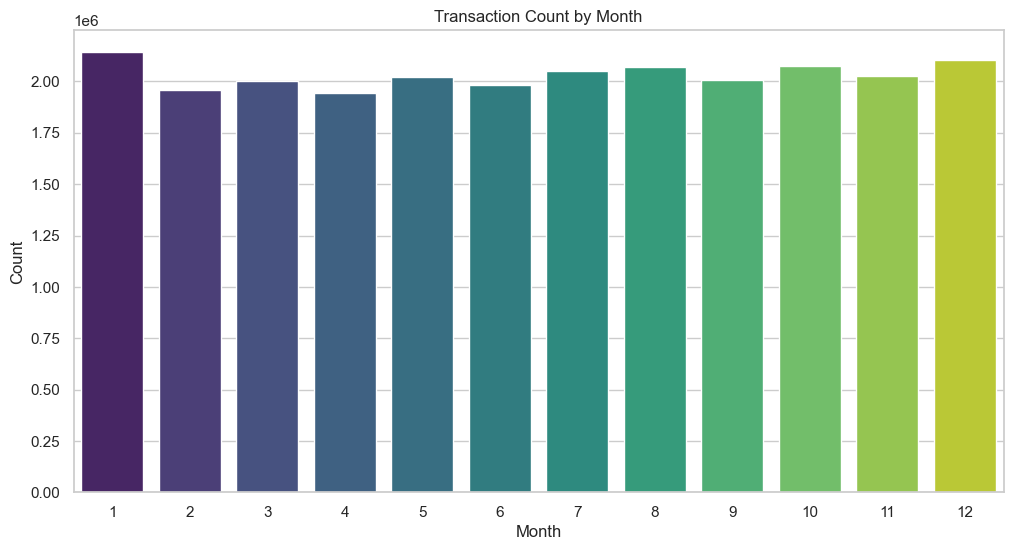

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_8592\2728956427.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Day", data=df, palette="magma")


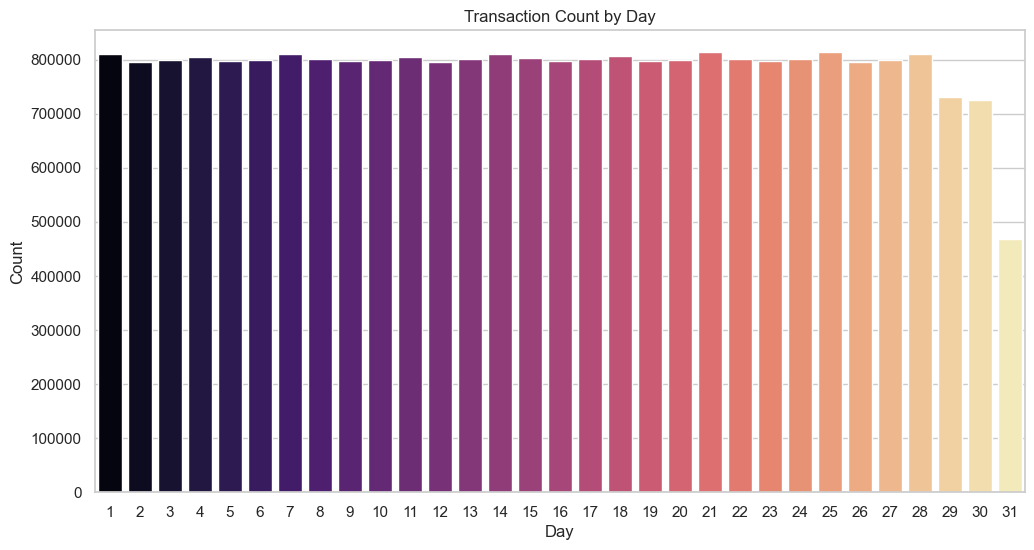

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_8592\2728956427.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Time", data=df, palette="coolwarm")


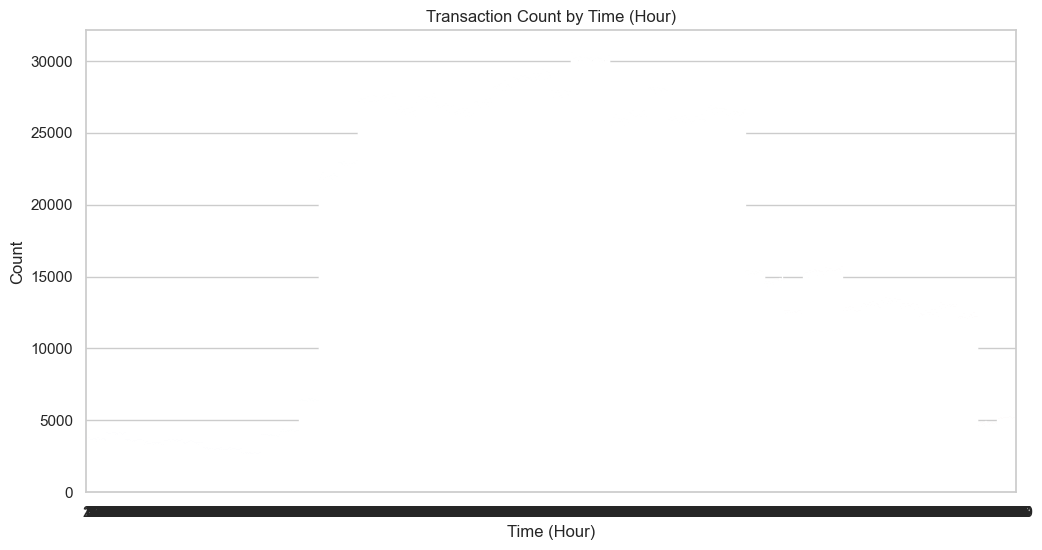

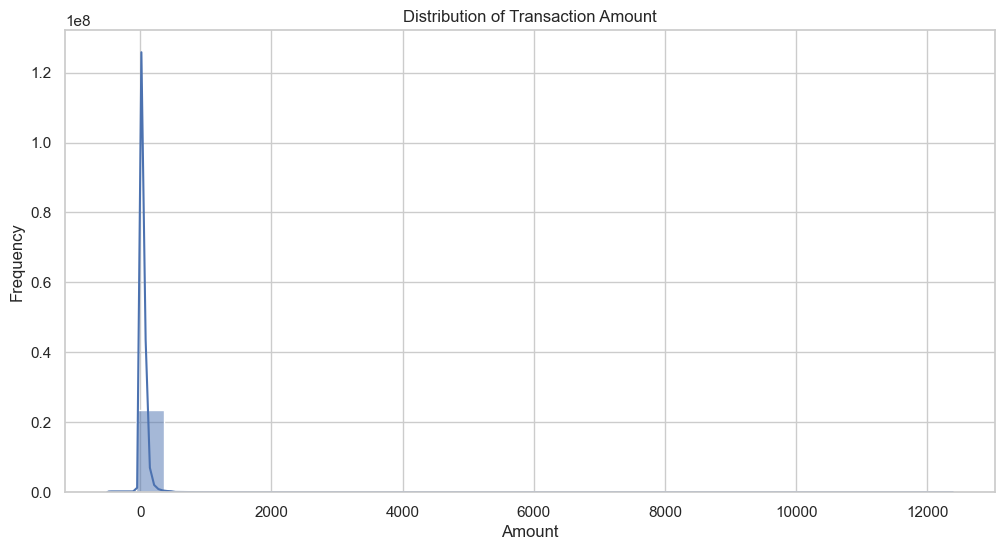

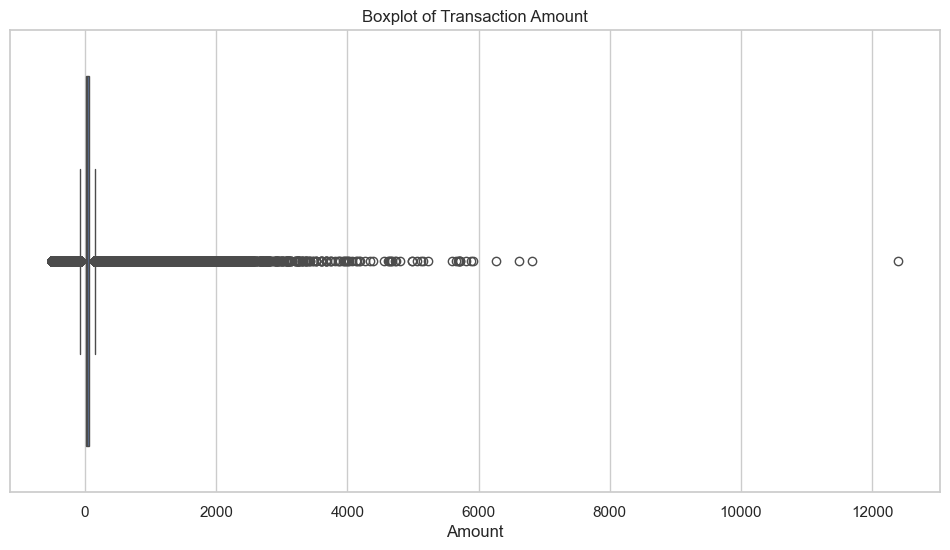

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_8592\2728956427.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Use Chip", data=df, palette="pastel")


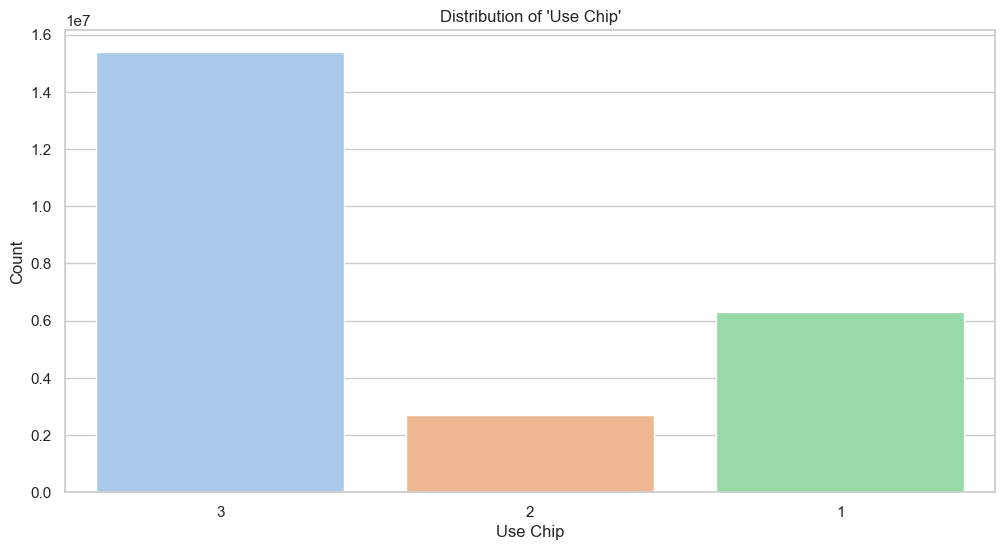

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_8592\2728956427.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_merchants.values, y=top_merchants.index, palette="deep")


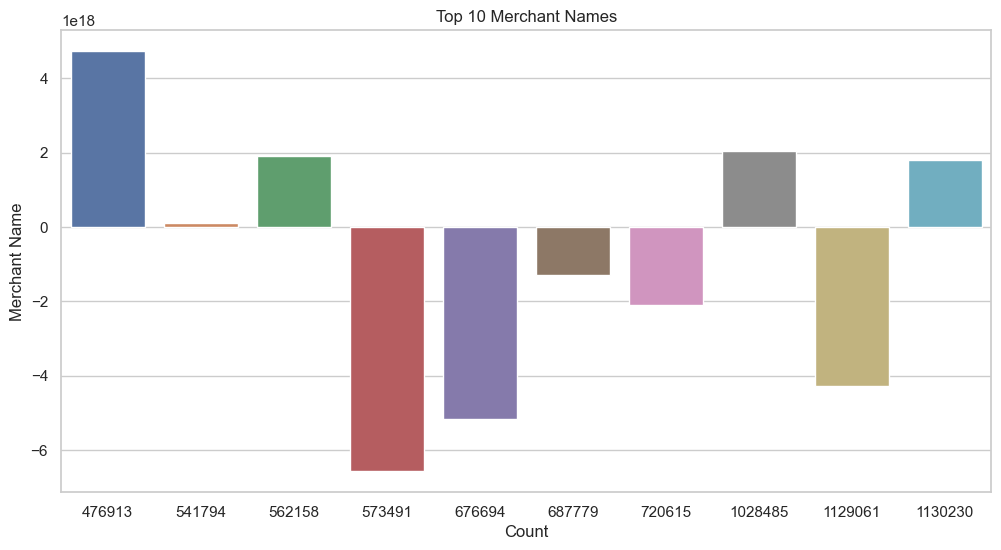

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_8592\2728956427.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="Set2")


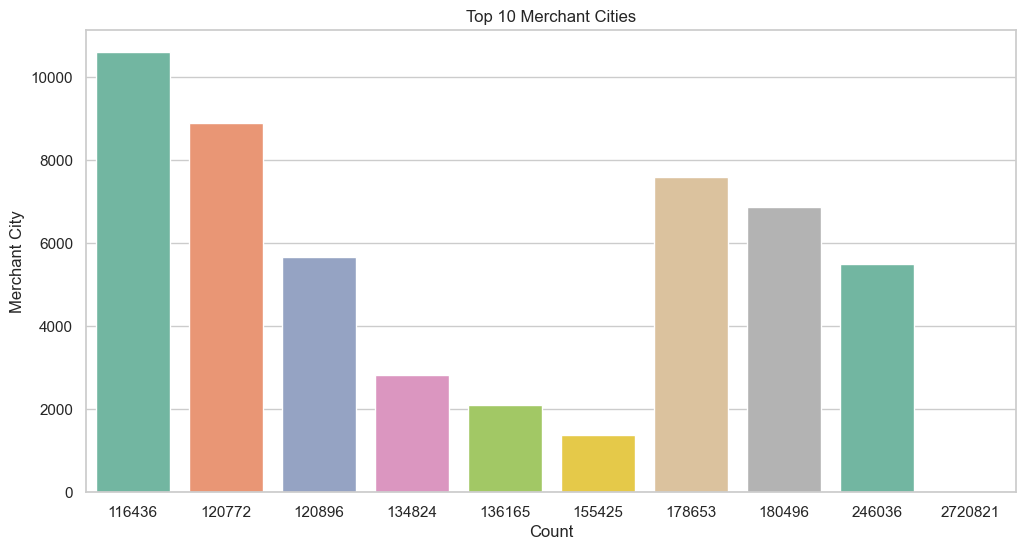

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_8592\2728956427.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="Set1")


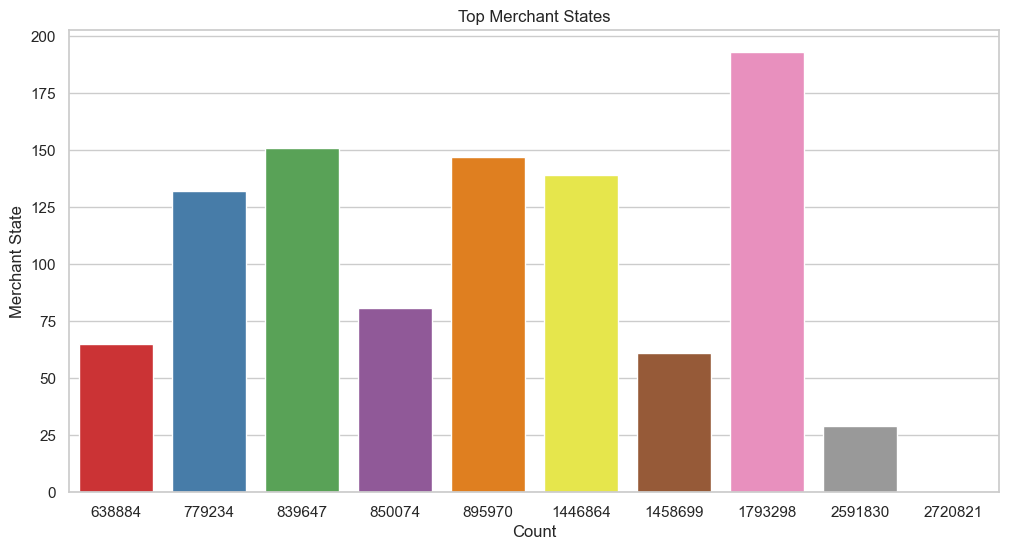

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_8592\2728956427.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_zips.values, y=top_zips.index, palette="Blues_d")


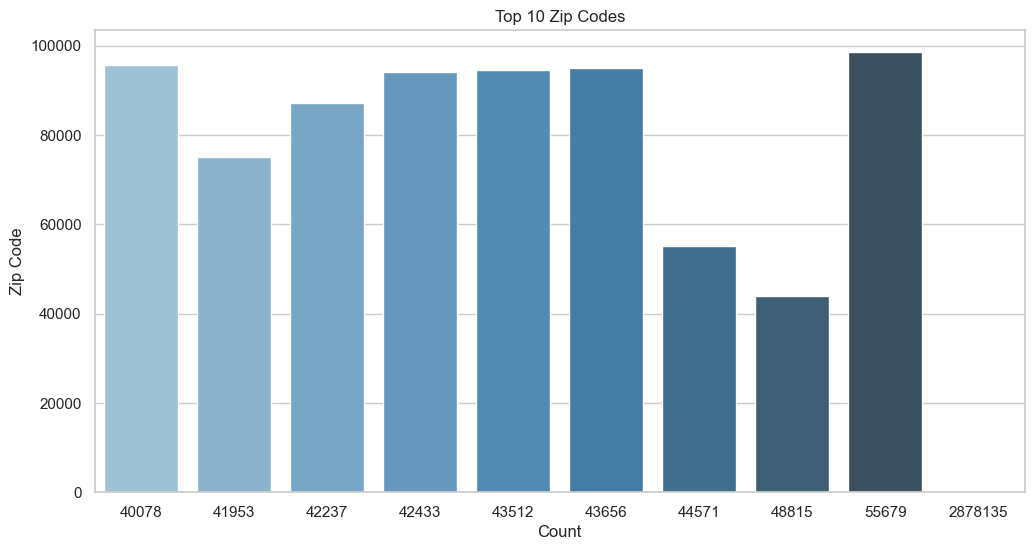

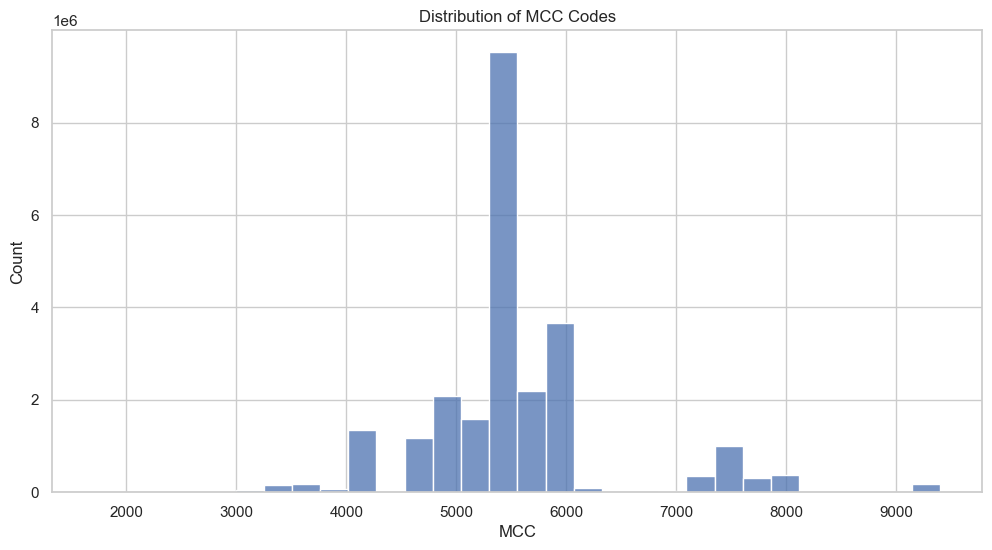

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_8592\2728956427.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Errors?", data=df, palette="cubehelix")


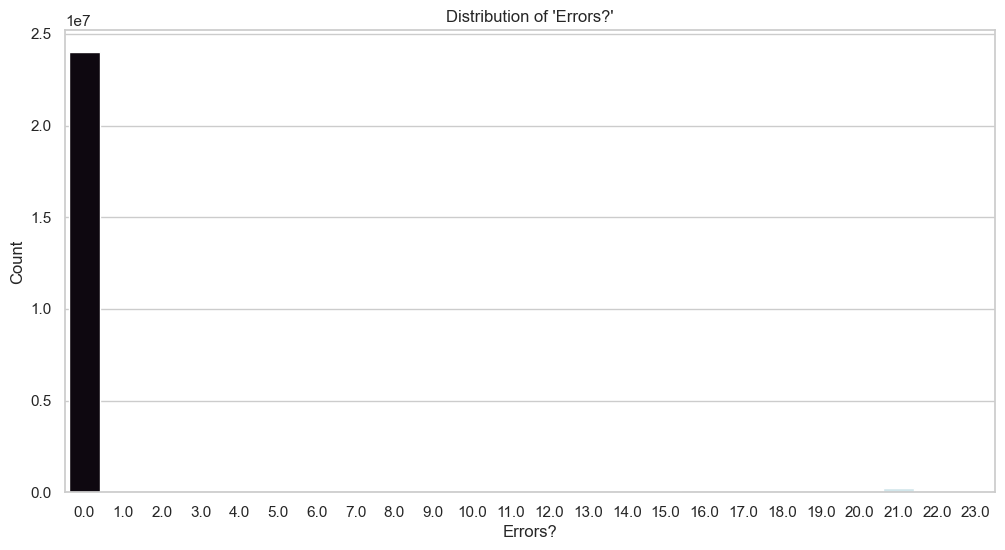

C:\Users\Tilak Devi\AppData\Local\Temp\ipykernel_8592\2728956427.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Is Fraud?", data=df, palette="pastel")


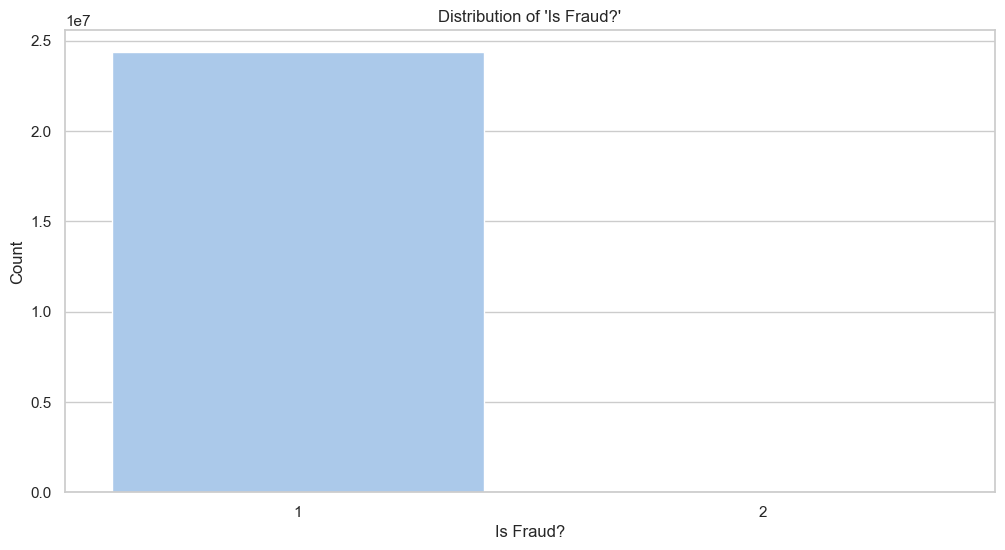


Summary Statistics:
               Month           Day          Time        Amount  Use Chip  \
count   2.438690e+07  2.438690e+07  2.438690e+07  2.438690e+07  24386900   
unique           NaN           NaN           NaN           NaN         3   
top              NaN           NaN           NaN           NaN         3   
freq             NaN           NaN           NaN           NaN  15386082   
mean    6.525064e+00  1.571812e+01  7.754380e+02  4.363401e+01       NaN   
std     3.472355e+00  8.794073e+00  3.042578e+02  8.202239e+01       NaN   
min     1.000000e+00  1.000000e+00  1.000000e+00 -5.000000e+02       NaN   
25%     3.000000e+00  8.000000e+00  5.450000e+02  9.200000e+00       NaN   
50%     7.000000e+00  1.600000e+01  7.630000e+02  3.014000e+01       NaN   
75%     1.000000e+01  2.300000e+01  9.870000e+02  6.506000e+01       NaN   
max     1.200000e+01  3.100000e+01  1.440000e+03  1.239050e+04       NaN   

        Merchant Name  Merchant City  Merchant State           Zip

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Load the Dataset
# ----------------------------
file_path = "main4.csv"  # Update this path if necessary
df = pd.read_csv(file_path)

# Display initial rows to verify the data
print("Dataset Head:")
print(df.head())

# ----------------------------
# 2. Data Cleaning & Transformation
# ----------------------------

# Convert the 'Amount' column:
# Remove any dollar signs and commas, then convert to float.
df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Time' to numeric (assuming it represents an hour of the day).
df["Time"] = pd.to_numeric(df["Time"], errors='coerce')

# Convert 'Use Chip' to a string (categorical) for plotting purposes.
df["Use Chip"] = df["Use Chip"].astype(str)

# For 'Errors?', fill missing values with 0 (or a default value) and convert to float.
df["Errors?"] = df["Errors?"].fillna(0).astype(float)

# Convert target column 'Is Fraud?' to numeric (binary)
df["Is Fraud?"] = pd.to_numeric(df["Is Fraud?"], errors='coerce')

# ----------------------------
# 3. Exploratory Data Analysis (EDA)
# ----------------------------
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 3.1. Month Distribution
plt.figure()
sns.countplot(x="Month", data=df, palette="viridis")
plt.title("Transaction Count by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

# 3.2. Day Distribution
plt.figure()
sns.countplot(x="Day", data=df, palette="magma")
plt.title("Transaction Count by Day")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

# 3.3. Time Distribution (Hour)
plt.figure()
sns.countplot(x="Time", data=df, palette="coolwarm")
plt.title("Transaction Count by Time (Hour)")
plt.xlabel("Time (Hour)")
plt.ylabel("Count")
plt.show()

# 3.4. Transaction Amount Distribution
plt.figure()
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Boxplot to highlight outliers in Transaction Amount
plt.figure()
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Transaction Amount")
plt.xlabel("Amount")
plt.show()

# 3.5. Distribution of 'Use Chip'
plt.figure()
sns.countplot(x="Use Chip", data=df, palette="pastel")
plt.title("Distribution of 'Use Chip'")
plt.xlabel("Use Chip")
plt.ylabel("Count")
plt.show()

# 3.6. Merchant Name Analysis
# Display top 10 most frequent merchant names
top_merchants = df["Merchant Name"].value_counts().head(10)
plt.figure()
sns.barplot(x=top_merchants.values, y=top_merchants.index, palette="deep")
plt.title("Top 10 Merchant Names")
plt.xlabel("Count")
plt.ylabel("Merchant Name")
plt.show()

# 3.7. Merchant City Analysis
top_cities = df["Merchant City"].value_counts().head(10)
plt.figure()
sns.barplot(x=top_cities.values, y=top_cities.index, palette="Set2")
plt.title("Top 10 Merchant Cities")
plt.xlabel("Count")
plt.ylabel("Merchant City")
plt.show()

# 3.8. Merchant State Analysis
top_states = df["Merchant State"].value_counts().head(10)
plt.figure()
sns.barplot(x=top_states.values, y=top_states.index, palette="Set1")
plt.title("Top Merchant States")
plt.xlabel("Count")
plt.ylabel("Merchant State")
plt.show()

# 3.9. Zip Code Analysis
# Treat Zip codes as categorical and display the top 10
top_zips = df["Zip"].value_counts().head(10)
plt.figure()
sns.barplot(x=top_zips.values, y=top_zips.index, palette="Blues_d")
plt.title("Top 10 Zip Codes")
plt.xlabel("Count")
plt.ylabel("Zip Code")
plt.show()

# 3.10. MCC Distribution
plt.figure()
sns.histplot(df["MCC"], bins=30, kde=False)
plt.title("Distribution of MCC Codes")
plt.xlabel("MCC")
plt.ylabel("Count")
plt.show()

# 3.11. Errors? Column Analysis
plt.figure()
sns.countplot(x="Errors?", data=df, palette="cubehelix")
plt.title("Distribution of 'Errors?'")
plt.xlabel("Errors?")
plt.ylabel("Count")
plt.show()

# 3.12. Is Fraud? Analysis (Target Variable)
plt.figure()
sns.countplot(x="Is Fraud?", data=df, palette="pastel")
plt.title("Distribution of 'Is Fraud?'")
plt.xlabel("Is Fraud?")
plt.ylabel("Count")
plt.show()

# Optional: Print summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Numeric Columns: ['Month', 'Day', 'Time', 'Amount', 'Use Chip', 'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC', 'Errors?', 'Is Fraud?']
Total rows processed: 24386900
Correlation Matrix:
                   Month       Day      Time    Amount  Use Chip  \
Month           1.000000  0.013521 -0.000525 -0.000629  0.032193   
Day             0.013521  1.000000 -0.000166 -0.000569  0.001104   
Time           -0.000525 -0.000166  1.000000  0.051861  0.003861   
Amount         -0.000629 -0.000569  0.051861  1.000000 -0.002100   
Use Chip        0.032193  0.001104  0.003861 -0.002100  1.000000   
Merchant Name   0.000207 -0.000045 -0.005978 -0.013455  0.013821   
Merchant City   0.002269 -0.000360 -0.007302 -0.012827  0.083689   
Merchant State  0.002340  0.000051  0.009395 -0.027366  0.086030   
Zip             0.000403 -0.000437  0.000154 -0.038409  0.080222   
MCC             0.000606  0.000134  0.029852 -0.033966  0.033037   
Errors?        -0.000051 -0.000248  0.004708  0

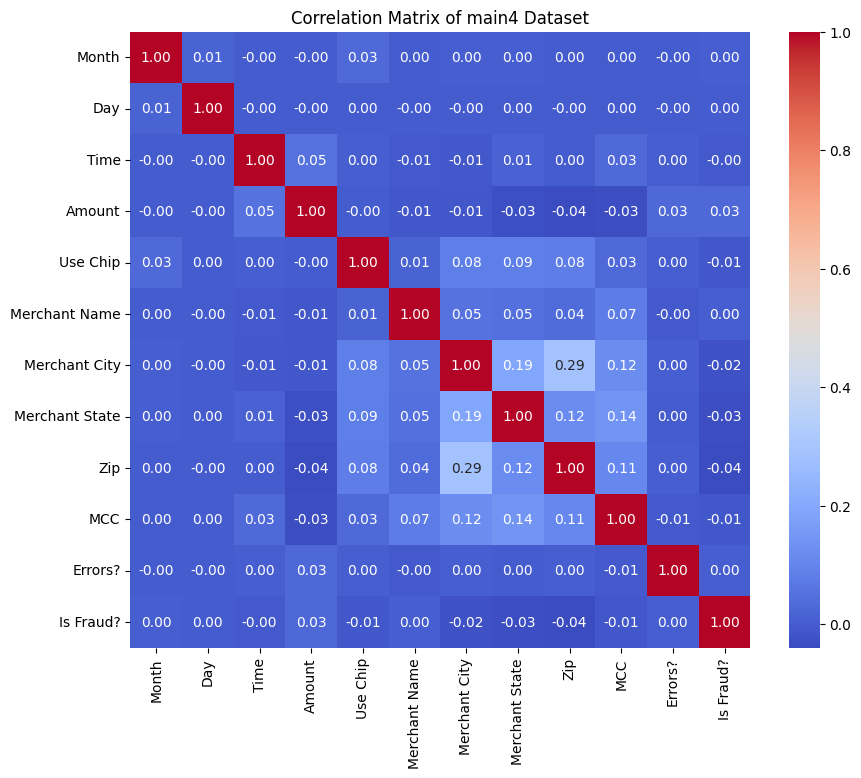

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Settings and File Path
# ----------------------------
file_path = "main4.csv"  # Adjust the path if needed
chunksize = 100000      # Adjust chunk size based on your system memory

# ----------------------------
# 2. Determine Numeric Columns
# ----------------------------
# Read a small chunk to determine which columns are numeric.
first_chunk = pd.read_csv(file_path, nrows=chunksize)
numeric_cols = first_chunk.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric Columns:", numeric_cols)

# ----------------------------
# 3. Initialize Accumulators for Batch Processing
# ----------------------------
# We'll accumulate the following:
# - total_count: Total number of rows processed
# - total_sum: Sum of all rows (for each numeric column)
# - total_outer: Sum of outer products (X.T dot X) for each chunk
total_count = 0
d = len(numeric_cols)
total_sum = np.zeros(d)
total_outer = np.zeros((d, d))

# ----------------------------
# 4. Process the Dataset in Chunks
# ----------------------------
for chunk in pd.read_csv(file_path, usecols=numeric_cols, chunksize=chunksize):
    # Drop rows with missing values in numeric columns (you can choose a different strategy if desired)
    chunk = chunk.dropna()
    
    # Convert the chunk to a numpy array (rows x numeric features)
    X = chunk.values
    n = X.shape[0]
    if n == 0:
        continue  # Skip empty chunks

    total_count += n
    total_sum += X.sum(axis=0)
    total_outer += np.dot(X.T, X)

print("Total rows processed:", total_count)

# ----------------------------
# 5. Compute Means, Covariance, and Correlation Matrix
# ----------------------------
# Mean vector
mean = total_sum / total_count

# Covariance matrix: cov = E[XX^T] - mean*mean^T, where E[XX^T] = total_outer / total_count
cov = total_outer / total_count - np.outer(mean, mean)

# Standard deviations for each column
std = np.sqrt(np.diag(cov))

# Compute correlation matrix: corr[i,j] = cov[i,j] / (std[i]*std[j])
corr_matrix = cov / np.outer(std, std)

# Convert to a DataFrame for better readability
corr_df = pd.DataFrame(corr_matrix, index=numeric_cols, columns=numeric_cols)

# ----------------------------
# 6. Display and Visualize the Correlation Matrix
# ----------------------------
print("Correlation Matrix:")
print(corr_df)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of main4 Dataset")
plt.show()
